# Advanced Visuals with Pandas and Matplotlib
 
Into this notebook, we will be looking at some of the more advanced visualization techniques that can be used with Pandas and Matplotlib. In more detail, we will take a look at how can we use different settings to make our visualizations more and informative.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('datasets/Iris.csv')

In [3]:
# First, let us see different styles available in matplotlib
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

All these different styles are available in the Matplotlib documentation. You can find them here: https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html. I really like the pastel style, but you can choose whatever you like.

In [4]:
# set the pastel style
plt.style.use('seaborn-pastel')

In [5]:
# Other settings we can already set from the beginning are the size of the figure and the DPI
plt.rcParams['figure.figsize'] = (10, 5)
plt.rcParams['figure.dpi'] = 100


## A simple plot

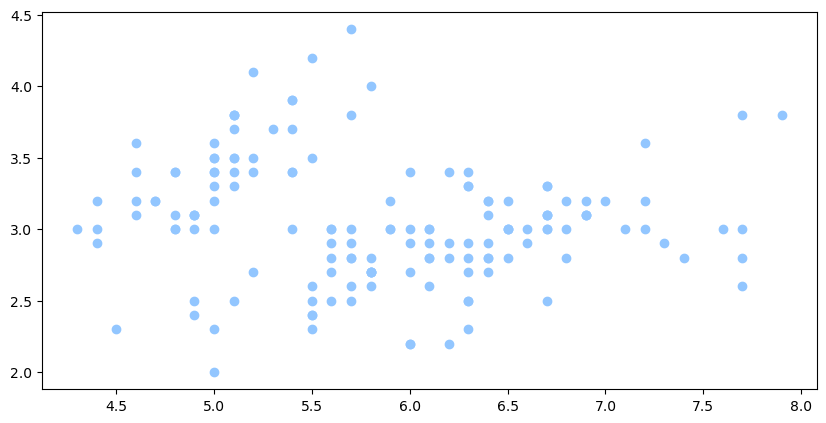

In [6]:
# Simple scatter plot of the data
plt.scatter(df['SepalLengthCm'], df['SepalWidthCm'])

## Let us make it more informative

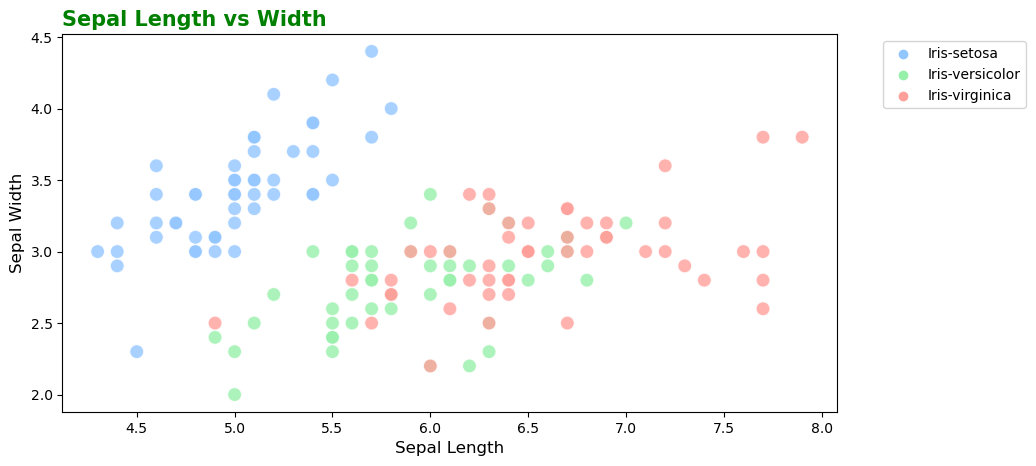

In [7]:
# Add title and axis names
plt.title('Sepal Length vs Width' , color = 'green', fontsize = 15, fontweight = 'bold', loc = 'left')
plt.xlabel('Sepal Length', fontsize = 12)
plt.ylabel('Sepal Width', fontsize = 12)
sns.scatterplot(x = 'SepalLengthCm', y = 'SepalWidthCm', hue = 'Species', data = df, s=100, alpha = 0.8)
plt.legend(bbox_to_anchor = (1.05, 1), loc = 2)


# Create plot grids
 
Plot grids are very useful when you want to compare different plots. You can use them to compare different plots side by side or to compare different plots on top of each other. In this example, we will be using them to compare different plots side by side


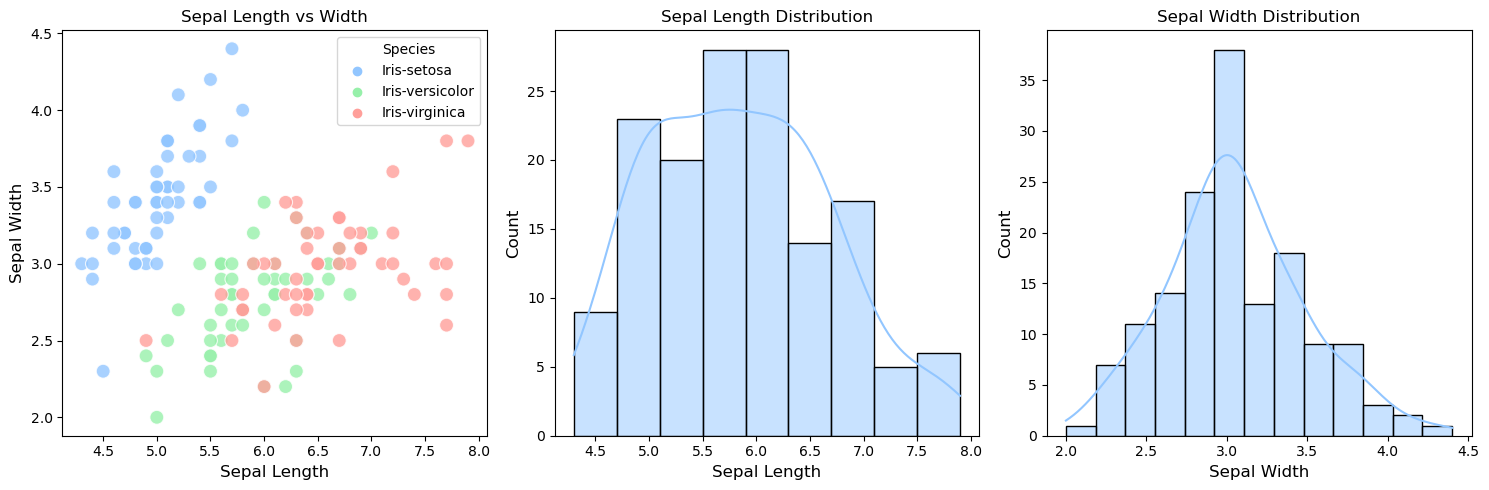

In [8]:
fig, ax = plt.subplots(1, 3, figsize = (15, 5))

sns.scatterplot(x = 'SepalLengthCm', y = 'SepalWidthCm', hue = 'Species', data = df, s=100, alpha = 0.8, ax = ax[0])
sns.histplot(df['SepalLengthCm'], ax = ax[1], kde = True)
sns.histplot(df['SepalWidthCm'], ax = ax[2], kde = True)

ax[0].set_title('Sepal Length vs Width' )
ax[0].set_xlabel('Sepal Length', fontsize = 12)
ax[0].set_ylabel('Sepal Width', fontsize = 12)

ax[1].set_title('Sepal Length Distribution')
ax[1].set_xlabel('Sepal Length', fontsize = 12)
ax[1].set_ylabel('Count', fontsize = 12)

ax[2].set_title('Sepal Width Distribution')
ax[2].set_xlabel('Sepal Width', fontsize = 12)
ax[2].set_ylabel('Count', fontsize = 12)

plt.tight_layout()


## Add artifacts in the plot
 
This technique is very useful when you want to highlight some specific part of your plot.


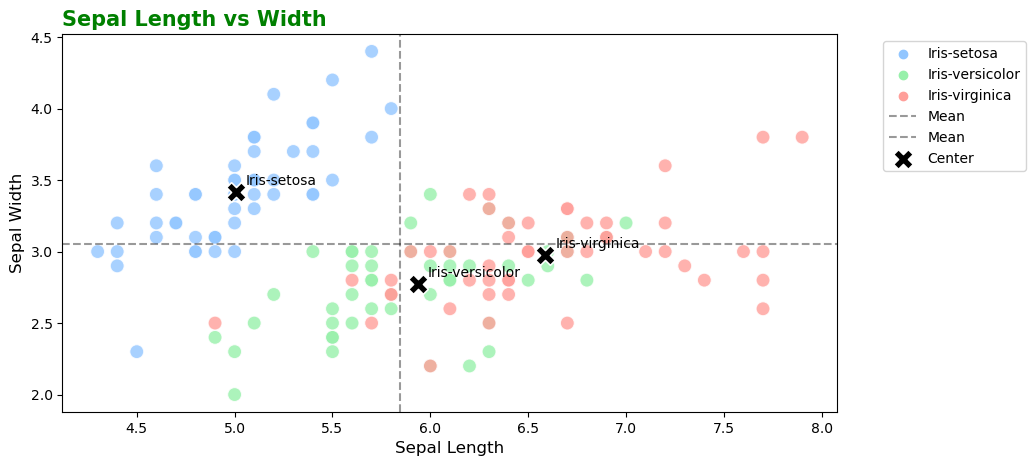

In [9]:
plt.title('Sepal Length vs Width' , color = 'green', fontsize = 15, fontweight = 'bold', loc = 'left')
plt.xlabel('Sepal Length', fontsize = 12)
plt.ylabel('Sepal Width', fontsize = 12)
sns.scatterplot(x = 'SepalLengthCm', y = 'SepalWidthCm', hue = 'Species', data = df, s=100, alpha = 0.8)

plt.axhline(df['SepalWidthCm'].mean(), color = 'black', linestyle = '--', label = 'Mean', alpha = 0.4)
plt.axvline(df['SepalLengthCm'].mean(), color = 'black', linestyle = '--', label = 'Mean', alpha = 0.4)

centers = df[['SepalLengthCm','Species', 'SepalWidthCm']].groupby('Species').mean()
centers.reset_index(inplace = True)

sns.scatterplot(x = 'SepalLengthCm', y = 'SepalWidthCm', color='black', data = centers, s=200, marker = 'X', label = 'Center')
for i in range(0, centers.shape[0]):
    plt.text(x = centers['SepalLengthCm'][i] + 0.05, y = centers['SepalWidthCm'][i] + 0.05, s = centers['Species'][i], size = 10)
plt.legend(bbox_to_anchor = (1.05, 1), loc = 2)
     